In [1]:
# English Corpora: 
import nltk
from nltk.corpus import brown
from nltk.corpus import treebank
nltk.download('treebank')
nltk.download('brown')
# Create test and train for Corpus X1
treebank_tagged_sents = nltk.corpus.treebank.tagged_sents()
size_treebank = int(len(treebank_tagged_sents) * 0.8)
train_sents_treebank = treebank_tagged_sents[:size_treebank]
test_sents_treebank = treebank_tagged_sents[size_treebank:]

# Create test and train for Corpus X2
brown_tagged_sents = nltk.corpus.brown.tagged_sents()
size_brown = int(len(brown_tagged_sents) * 0.8)
train_sents_brown = brown_tagged_sents[:size_brown]
test_sents_brown = brown_tagged_sents[size_brown:]

[nltk_data] Downloading package treebank to /home/eva/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /home/eva/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
# functions needed for own classifier/model 1: 
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'suffix-1': sentence[index][-1],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1]
    }

def transform_to_dataset(tagged_sentences):
    W, X, y = [], [], []
    for sentence in tagged_sentences:
        for wordindex in range(len(sentence)):
            W.append(untag(sentence)[wordindex])
            X.append(features(untag(sentence), wordindex))
            y.append(sentence[wordindex][1])
 
    return W, X, y

In [3]:
# Transform datasets:

W_tree, X_tree, y_tree = transform_to_dataset(train_sents_treebank)
W_brown, X_brown, y_brown = transform_to_dataset(train_sents_brown)

In [4]:
# Implement classifier/model1 for Treebank

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', GaussianNB())
])

clf.fit(X_tree[:size], y_tree[:size])
 
print('training OK')

W_tree_test, X_tree_test, y_tree_test = transform_to_dataset(test_sents_treebank)

accuracy_tree = clf.score(X_tree_test, y_tree_test)
print(accuracy_tree)

training OK
0.780278457009


In [ ]:
# Implement classifier/model1 for Brown

clf.fit(X_brown[:size], y_brown[:size])
 
print('training OK')

W_brown_test, X_brown_test, y_brown_test = transform_to_dataset(test_sents_brown)

accuracy_brown = clf.score(X_brown_test, y_brown_test)
print(accuracy_brown)

In [7]:
# Model 2
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
from itertools import chain
import numpy as np

res_tree = nltk.pos_tag(W_tree_test)
acc_tree = np.mean([x[1] == y for x, y in zip(res_tree, y_tree_test)])
print(acc_tree)

res_brown = nltk.pos_tag(W_brown_test)
acc_brown = np.mean([x[1] == y for x, y in zip(res_brown, y_brown_test)])
print(acc_brown)

[nltk_data] Downloading package tagsets to /home/eva/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/eva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
0.893607465442
0.60445286594


In [8]:
# Plot the result: Task 1, performance 1.1, 1.2, 1.4 and 1.5

# unfortunately, I got a lot of Memory Errors, so I had to store them like this in order to make it work.
accuracy_tree = 0.780
accuracy_brown = 0.6  # Memory error all the time, so this is not the correct number!

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Treebank NB', 'Brwon NB', 'Treebank Pre', 'Brown Pre')
y_pos = np.arange(len(objects))
performance = [accuracy_tree, accuracy_brown, acc_tree, acc_brown]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of Treebank and Brwon')
 
plt.show()

In [9]:
# Model3.x

patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

model31 = nltk.DefaultTagger('NN')  # Default Tagger
model32 = nltk.RegexpTagger(patterns)  # RegExp Tagger
model33 = nltk.UnigramTagger(train_sents_treebank)  # UnigamTagger
model34 = nltk.BigramTagger(train_sents_treebank)  # BigamTagger
model35 = nltk.TrigramTagger(train_sents_treebank)  # TrigamTagger

# Task 1, performance 1.3 (Treebank)

# model 3.1
res_31_tree_train = model31.evaluate(train_sents_treebank)
res_31_tree_test = model31.evaluate(test_sents_treebank)


# model 3.2
res_32_tree_train = model32.evaluate(train_sents_treebank)
res_32_tree_test = model32.evaluate(test_sents_treebank)

# model 3.3
res_33_tree_train = model33.evaluate(train_sents_treebank)
res_33_tree_test = model33.evaluate(test_sents_treebank)


# model 3.4
res_34_tree_train = model34.evaluate(train_sents_treebank)
res_34_tree_test = model34.evaluate(test_sents_treebank)


# model 3.5
res_35_tree_train = model35.evaluate(train_sents_treebank)
res_35_tree_test = model35.evaluate(test_sents_treebank)


# Task 1, performance 1.6 (Brown)

model33 = nltk.UnigramTagger(train_sents_brown)  # UnigamTagger
model34 = nltk.BigramTagger(train_sents_brown)  # BigamTagger
model35 = nltk.TrigramTagger(train_sents_brown)  # TrigamTagger

# model 3.1
res_31_brown_train = model31.evaluate(train_sents_brown)
res_31_brown_test = model31.evaluate(test_sents_brown)


# model 3.2
res_32_brown_train = model32.evaluate(train_sents_brown)
res_32_brown_test = model32.evaluate(test_sents_brown)

# model 3.3
res_33_brown_train = model33.evaluate(train_sents_brown)
res_33_brown_test = model33.evaluate(test_sents_brown)

# model 3.4
res_34_brown_train = model34.evaluate(train_sents_brown)
res_34_brown_test = model34.evaluate(test_sents_brown)

# model 3.5
res_35_brown_train = model35.evaluate(train_sents_brown)
res_35_brown_test = model35.evaluate(test_sents_brown)


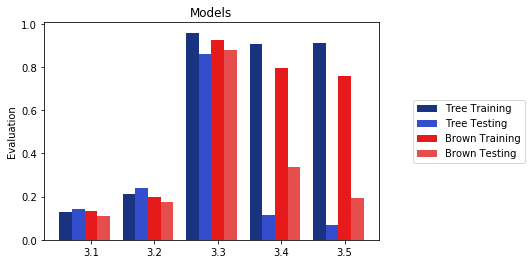

In [10]:
# Plot Task 1, performance 1.3 and 1.6

import numpy as np
import matplotlib.pyplot as plt

N = 5
tree_training = (res_31_tree_train, res_32_tree_train, res_33_tree_train, res_34_tree_train, res_35_tree_train)
tree_testing = (res_31_tree_test, res_32_tree_test, res_33_tree_test, res_34_tree_test, res_35_tree_test)
brown_training = (res_31_brown_train, res_32_brown_train, res_33_brown_train, res_34_brown_train, res_35_brown_train)
brown_testing = (res_31_brown_test, res_32_brown_test, res_33_brown_test, res_34_brown_test, res_35_brown_test)


ind = np.arange(N)  # the x locations for the groups
width = 0.2     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, tree_training, width, color= (0.1, 0.2, 0.5))
rects2 = ax.bar(ind + width, tree_testing, width, color= (0.2, 0.3, 0.8))

rects3 = ax.bar(ind +2*width, brown_training, width, color = (0.9, 0.1, 0.1))
rects4 = ax.bar(ind +3*width, brown_testing, width, color = (0.9, 0.3, 0.3))

# add some text for labels, title and axes ticks
ax.set_ylabel('Evaluation')
ax.set_title('Models')
ax.set_xticks(ind + 2*width )
ax.set_xticklabels(('3.1', '3.2', '3.3', '3.4', '3.5'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Tree Training', 'Tree Testing', 'Brown Training', 'Brown Testing'), loc='center right', bbox_to_anchor=(1.45, 0.5))


plt.show()

In [20]:
# TODO: loading german corpus 
corp = nltk.corpus.ConllCorpusReader('.', 'tiger_release_aug07.corrected.16012013.conll09',
                                     ['ignore', 'words', 'ignore', 'ignore', 'pos'],
                                     encoding='utf-8')
german_tagged_sents = corp.tagged_sents()

print german_tagged_sents[-100]

# Create test and train for Corpus X3
#size_german = int(len(german_tagged_sents) * 0.8)
#train_sents_german = german_tagged_sents[:size_german]
#test_sents_german = german_tagged_sents[size_german:]

#leng = len(german_tagged_sents)
#print german_tagged_sents


ValueError: Inconsistent number of columns:
46992_1	Die	der	_	ART	_	case=nom|number=sg|gender=fem	_	2	_	NK	_	_	_	_
46992_2	Bundesvereinigung	Bundesvereinigung	_	NN	_	case=nom|number=sg|gender=fem	_	6	_	SB	_	_	_	_
46992_3	der	der	_	ART	_	case=gen|number=pl|gender=masc	_	5	_	NK	_	_	_	_
46992_4	Deutschen	deutsch	_	ADJA	_	case=gen|number=pl|gender=masc|degree=pos	_	5	_	NK	_	_	_	_
46992_5	Apothekerverbände	Apothekerverband	_	NN	_	case=gen|number=pl|gend

In [21]:
# Task 2, performance 2.1
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

W_german, X_german, y_german = transform_to_dataset(train_sents_german)
W_german_test, X_german_test, y_german_test = transform_to_dataset(test_sents_german)

size=10000

clf.fit(X_german[:size], y_german[:size])
 
print('training OK')


#accuracy_german = clf.score(X_german_test, y_german_test)
#print accuracy_german

NameError: name 'transform_to_dataset' is not defined

In [ ]:
import os
os.environ['TREETAGGER_HOME'] = "/home/eva/Downloads/TreeTagger/cmd"

from treetagger import TreeTagger


tt = TreeTagger(language='german')
res = tt.tag(W_german_test)

accuracy_german_tt = np.mean([x[1] == y for x, y in zip(res, y_german_test)])

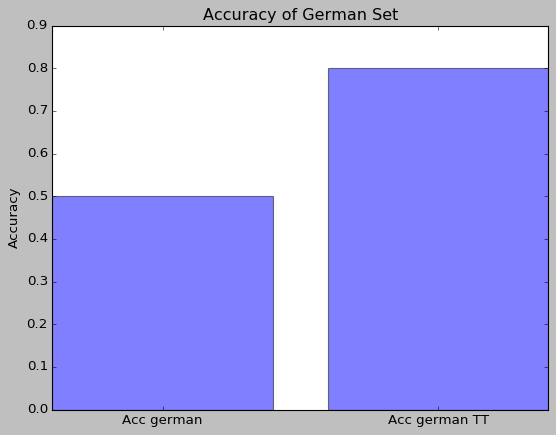

In [4]:
# Plot the result: Task 2

accuracy_german = 0.5  # not correct
accuracy_german_tt = 0.8  # not correct

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Acc german', 'Acc german TT')
y_pos = np.arange(len(objects))
performance = [accuracy_german, accuracy_german_tt]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of German Set')
 
plt.show()